# Завантаження та підготовка даних

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense
from keras.optimizers import Adam

# Завантаження даних
max_features = 20000  # Кількість слів (розмір словника)
maxlen = 100  # Максимальна довжина рецензії
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Підготовка даних (вирівнювання)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


17464789/17464789 [==============================] - 2s 0us/step


# Створення моделей
# Проста RNN

In [ ]:
def create_simple_rnn():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(SimpleRNN(128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

simple_rnn_model = create_simple_rnn()
simple_rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          2560000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2593025 (9.89 MB)
Trainable params: 2593025 (9.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# LSTM

In [ ]:
def create_lstm():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(LSTM(128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model = create_lstm()
lstm_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2691713 (10.27 MB)
Trainable params: 2691713 (10.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Двонаправлена LSTM

In [ ]:
def create_bidirectional_lstm():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

bidirectional_lstm_model = create_bidirectional_lstm()
bidirectional_lstm_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 bidirectional (Bidirection  (None, 256)               263168    
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2823425 (10.77 MB)
Trainable params: 2823425 (10.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Глибока LSTM

In [ ]:
def create_deep_lstm():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

deep_lstm_model = create_deep_lstm()
deep_lstm_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 lstm_2 (LSTM)               (None, 100, 128)          131584    
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2823297 (10.77 MB)
Trainable params: 2823297 (10.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Навчання та порівняння моделей

In [ ]:
models = {
    "Simple RNN": simple_rnn_model,
    "LSTM": lstm_model,
    "Bidirectional LSTM": bidirectional_lstm_model,
    "Deep LSTM": deep_lstm_model
}

history = {}

for name, model in models.items():
    print(f"Training {name}...")
    history[name] = model.fit(x_train, y_train,
                              epochs=5,
                              batch_size=batch_size,
                              validation_split=0.2,
                              verbose=1)

# Оцінка моделей
results = {}

for name, model in models.items():
    loss, accuracy = model.evaluate(x_test, y_test)
    results[name] = accuracy
    print(f"{name} Test Accuracy: {accuracy:.4f}")


Training Simple RNN...
Epoch 1/5
625/625 [==============================] - 67s 103ms/step - loss: 0.6150 - accuracy: 0.6409 - val_loss: 0.6296 - val_accuracy: 0.6360
Epoch 2/5
625/625 [==============================] - 54s 86ms/step - loss: 0.4679 - accuracy: 0.7831 - val_loss: 0.5733 - val_accuracy: 0.6952
Epoch 3/5
625/625 [==============================] - 52s 83ms/step - loss: 0.3600 - accuracy: 0.8462 - val_loss: 0.5033 - val_accuracy: 0.7780
Epoch 4/5
625/625 [==============================] - 51s 82ms/step - loss: 0.2574 - accuracy: 0.8968 - val_loss: 0.5456 - val_accuracy: 0.7928
Epoch 5/5
625/625 [==============================] - 50s 80ms/step - loss: 0.1934 - accuracy: 0.9251 - val_loss: 0.6387 - val_accuracy: 0.7668
Training LSTM...
Epoch 1/5
625/625 [==============================] - 25s 36ms/step - loss: 0.4295 - accuracy: 0.7972 - val_loss: 0.3533 - val_accuracy: 0.8452
Epoch 2/5
625/625 [==============================] - 7s 11ms/step - loss: 0.2385 - accuracy: 0.9067 -

# Візуалізація результатів

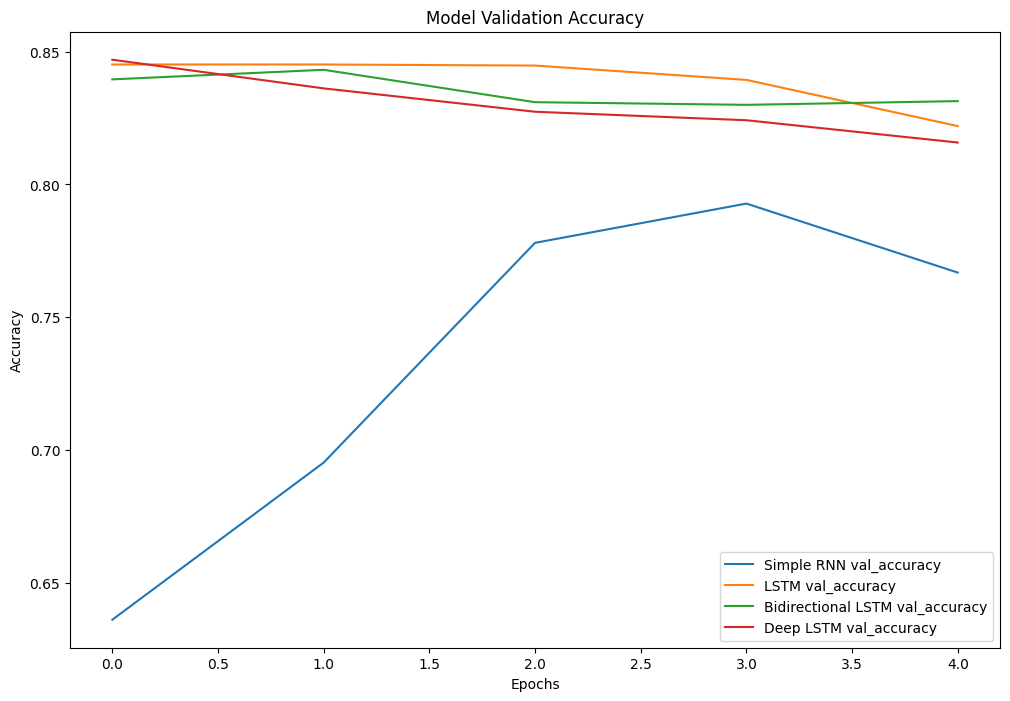

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for name, hist in history.items():
    plt.plot(hist.history['val_accuracy'], label=f'{name} val_accuracy')
plt.title('Model Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## Графік loss на тестових даних

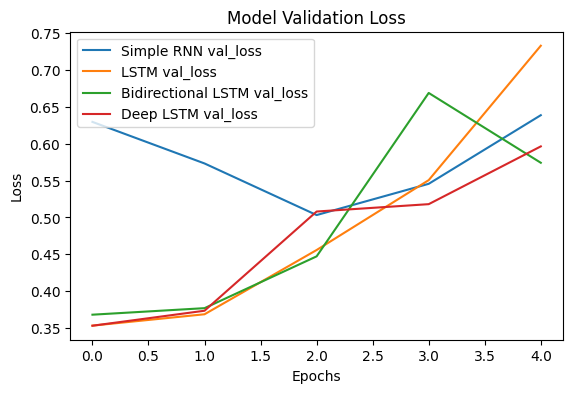

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
for name, hist in history.items():
    plt.plot(hist.history['val_loss'], label=f'{name} val_loss')
plt.title('Model Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Графік accuracy на тестових даних

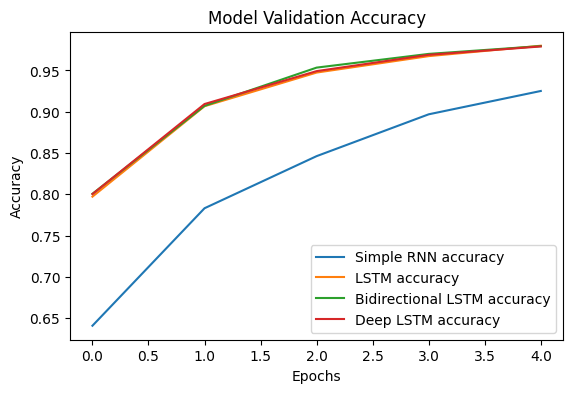

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 2)
for name, hist in history.items():
    plt.plot(hist.history['accuracy'], label=f'{name} accuracy')
plt.title('Model Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = {}

for name, model in models.items():
    loss, accuracy = model.evaluate(x_test, y_test)
    results[name] = {'loss': loss, 'accuracy': accuracy}
    print(f"{name} Test Accuracy: {accuracy:.4f}")


782/782 [==============================] - 9s 11ms/step - loss: 0.6343 - accuracy: 0.7610
Simple RNN Test Accuracy: 0.7610
782/782 [==============================] - 3s 4ms/step - loss: 0.7872 - accuracy: 0.8111
LSTM Test Accuracy: 0.8111
782/782 [==============================] - 4s 5ms/step - loss: 0.5955 - accuracy: 0.8237
Bidirectional LSTM Test Accuracy: 0.8237
782/782 [==============================] - 5s 6ms/step - loss: 0.6070 - accuracy: 0.8135
Deep LSTM Test Accuracy: 0.8135


# Висновок:
# найвища точність (accuracy) у моделі Bidirectional LSTM 0.82
# найнижча у Simple RNN 0.76

